In [58]:
import matplotlib.pyplot as plt
import numpy as np

from neurolib.models.toy import ToyModel
from neurolib.control.optimal_control import oc_toy, cost_functions

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\Huge \frac{d}{du} f = \frac{\partial f}{\partial u} + \lambda^T \frac{\partial h}{\partial u}$

$\Huge \dot{\lambda}^T \frac{\partial h}{\partial \dot{x}} = \frac{\partial f}{\partial x} + \lambda^T \frac{\partial h}{\partial x} $

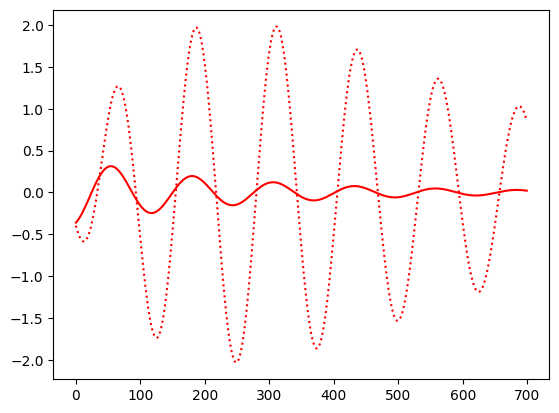

In [59]:
T =  70.
N = 2
cmat = np.zeros((N,N))
cmat[1,0] = 1.

toy = ToyModel(Cmat=cmat, Dmat=np.zeros(cmat.shape))
toy.params.duration = 10.
toy.params.x_init = 0.0 * np.ones(( 1,1 ))
toy.params.dt = 0.1
toy.params.tau = 4.
toy.params.alpha = 1e-1
toy.params.sigma_ou = 0.0
toy.run()

toy.params.x_init = np.array( [[toy.x[0,-1], toy.x[1,-1] ]] )
toy.params.y_init = np.array( [[toy.y[0,-1], toy.y[1,-1] ]] )

toy.params.duration = T
toy.run()

time = np.arange(0, T, toy.params.dt)

uzero = np.zeros((toy.x.shape))
toy.run()

plt.plot(toy.x[0,:], color="red")
plt.plot(toy.x[1,:], color="red", linestyle=":")
plt.show()

Optimal control with target time series
No valid gradient method chosen, chose standard gradient computation


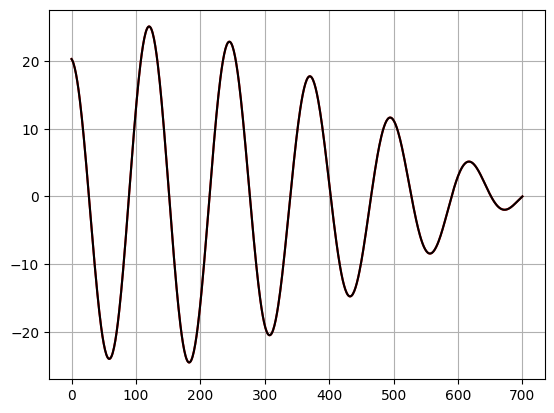

In [60]:
target = np.zeros(( N, 2, toy.x.shape[1]+1 ))
target[0,0,1:] = toy.x[1,:]
target[1,0,1:] = toy.x[1,:]
target[0,1,1:] = toy.y[1,:]
target[1,1,1:] = toy.y[1,:]

toy_controlled = oc_toy.OcToy(toy, target, print_array=np.arange(0,1000,100), cost_interval=(0,None), control_interval=(0,None))
toy_controlled.weights["w_2"] = 0.
toy_controlled.weights["w_p"] = 1.
toy_controlled.weights["w_f"] = 0.

if True:
    grad_an = toy_controlled.compute_gradient()
    grad_num = toy_controlled.compute_gradient_num()

    plt.plot(grad_an[0,0,:], color="red")
    plt.plot(grad_num[0,0,:], color="black")
    plt.grid()
    plt.show()

In [61]:
controlmat = np.zeros((2,1))
controlmat[0,0] = 1

toy_controlled = oc_toy.OcToy(toy, target, print_array=np.arange(0,1000,100), cost_interval=(0,None), control_interval=(0,None),
                              control_matrix=controlmat)

toy_controlled.weights["w_2"] = 0.
toy_controlled.weights["w_p"] = 1.
toy_controlled.weights["w_f"] = 0.

for k in range(2):
    for exp in np.arange(-8, 8, 4):
        toy_controlled.zero_step_encountered = False
        toy_controlled.step = 10.**exp
        toy_controlled.optimize(100)

    if True:
        grad_an = toy_controlled.compute_gradient()
        grad_num = toy_controlled.compute_gradient_num()

        plt.plot(grad_an[0,0,:], color="red", label="AN")
        plt.plot(grad_num[0,0,:], color="black", label="NUM")
        plt.grid()
        plt.legend()
        plt.show()

plt.plot(toy_controlled.get_xs()[0,0,:])
plt.plot(toy_controlled.get_xs()[1,0,:], linestyle=":")
plt.grid()
plt.show()

plt.plot(toy_controlled.control[0,0,:])
plt.plot(toy_controlled.control[1,0,:], linestyle=":")
plt.grid()
plt.show()

u_cos_opt = toy_controlled.control[:,0,:]

Optimal control with target time series
No valid gradient method chosen, chose standard gradient computation
Compute control for a deterministic system
Cost in iteration 0: 49.176590819758715


KeyboardInterrupt: 

Optimal control with target time series


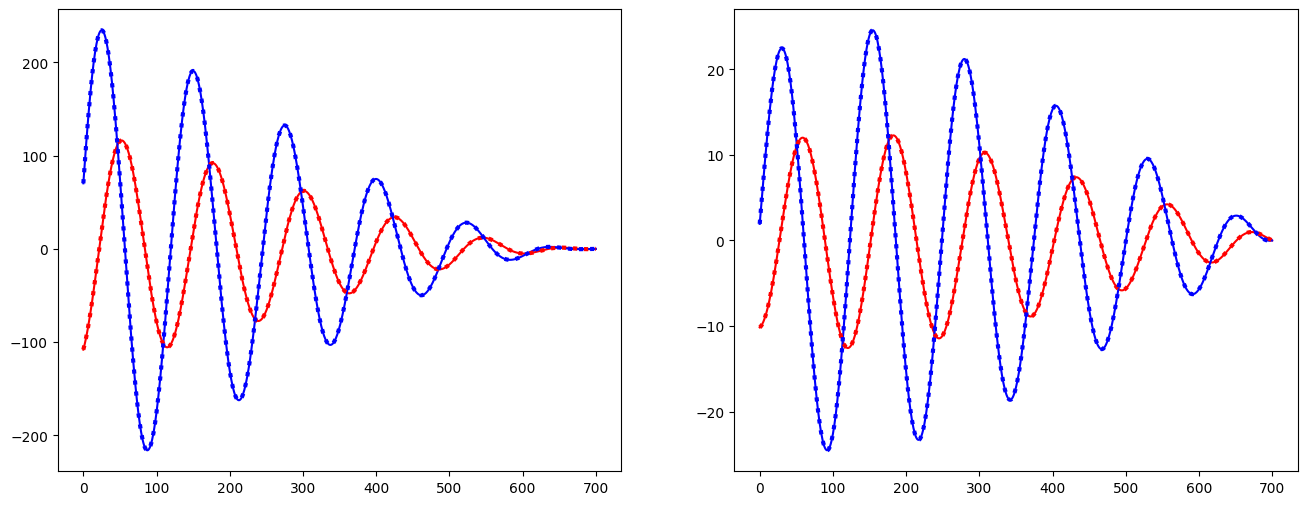

Compute control for a deterministic system
Cost in iteration 0: 24.581204439198256
Final cost : 0.8370025486769355


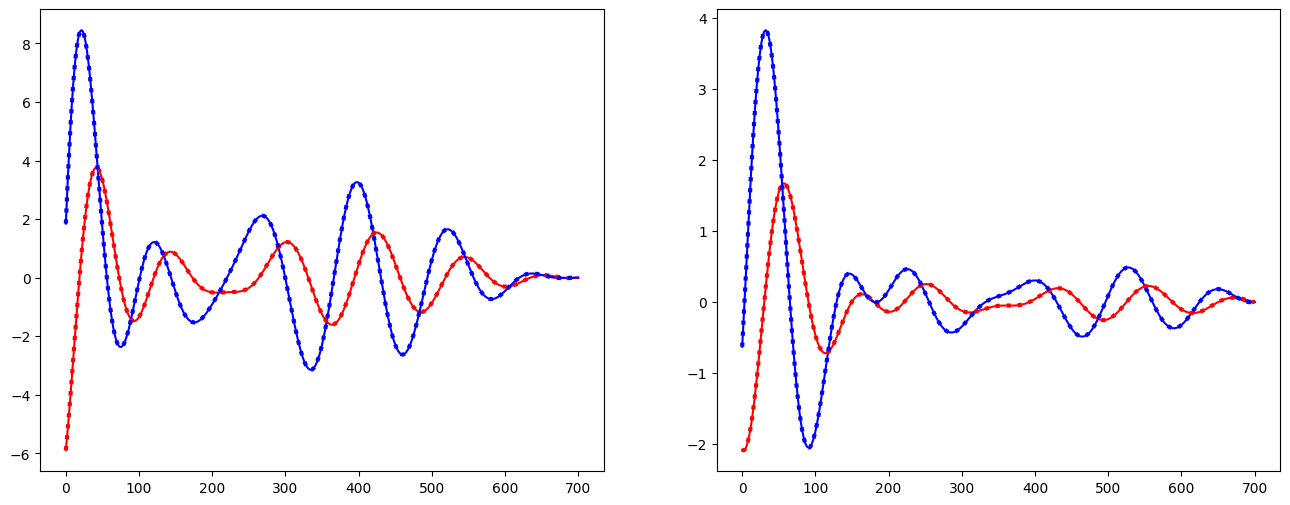

Compute control for a deterministic system
Cost in iteration 0: 0.8370025486769355
Final cost : 0.5299575256299351


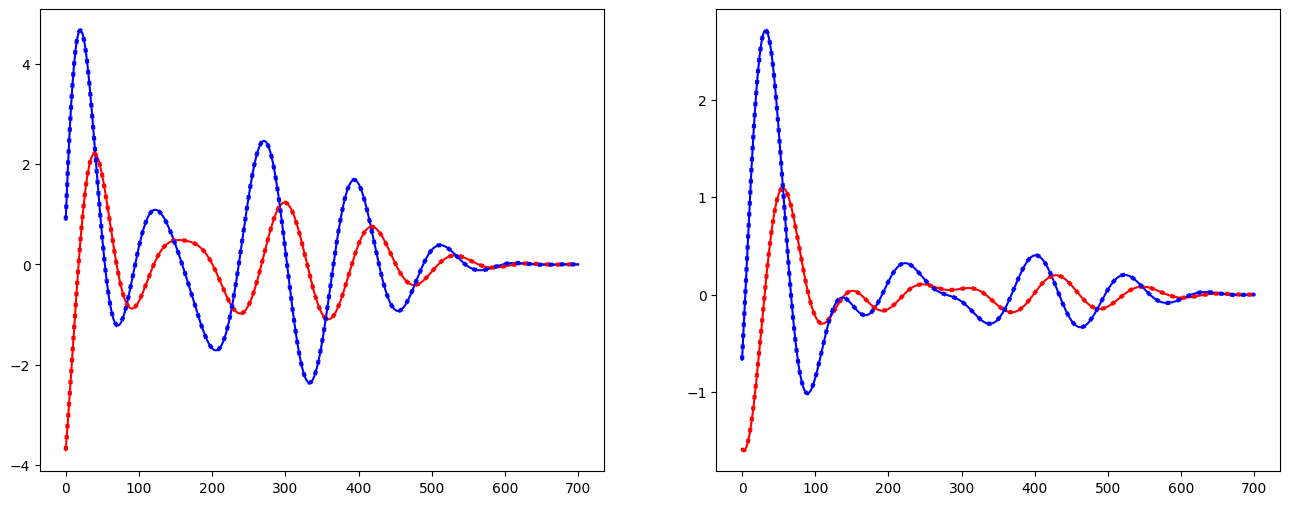

Compute control for a deterministic system
Cost in iteration 0: 0.5299575256299351
Final cost : 0.4104507081389494


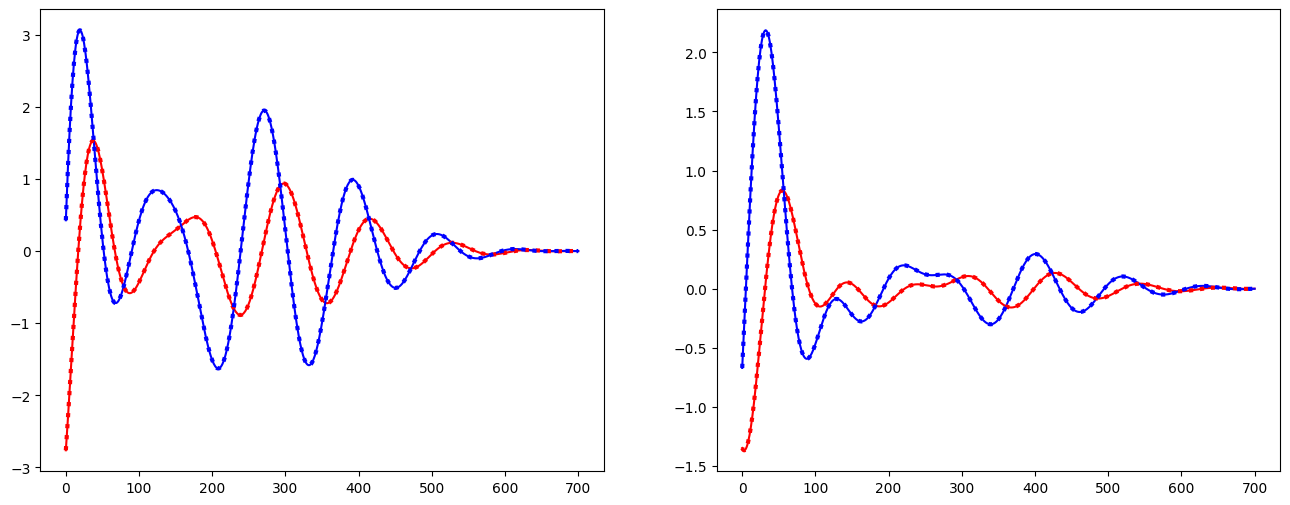

Compute control for a deterministic system
Cost in iteration 0: 0.4104507081389494
Final cost : 0.3419988644275343


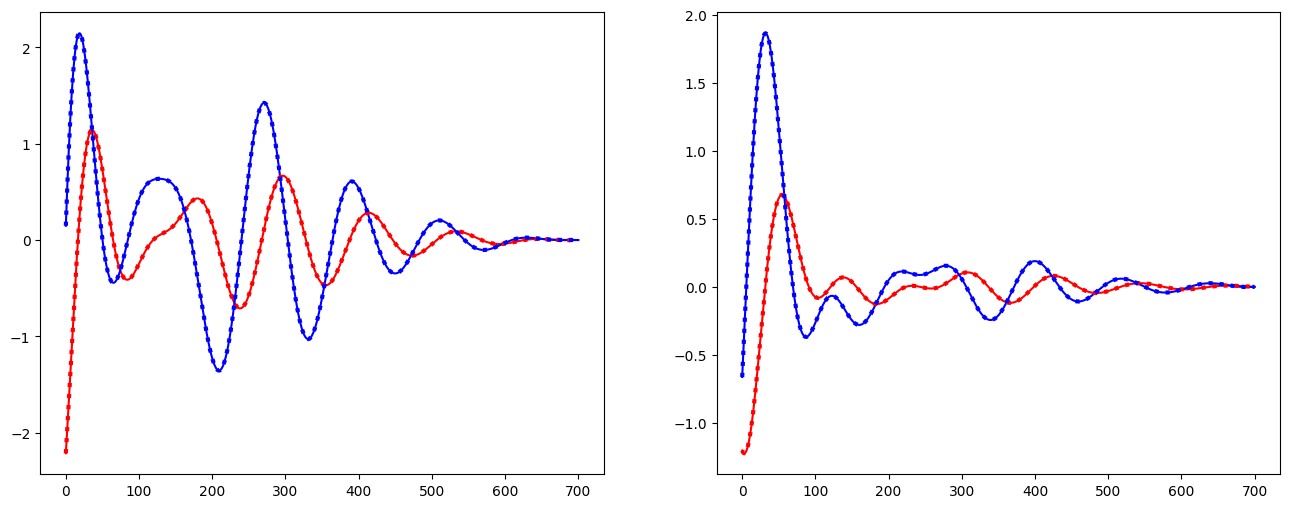

Compute control for a deterministic system
Cost in iteration 0: 0.3419988644275343
Final cost : 0.29668186484136194


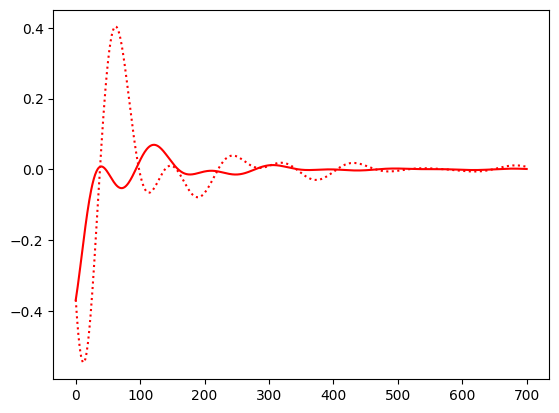

In [99]:
ui = 0 
toy.params.x_ext = uzero

toy_controlled = oc_toy.OcToy(toy, target, print_array=np.arange(0,1000,100),
                                cost_interval=(0,None), control_interval=(0,None), grad_method=0)
toy_controlled.weights["w_2"] = 0.
toy_controlled.weights["w_p"] = 0.
toy_controlled.weights["w_var"] = 1.

if False:
    plt.plot(toy_controlled.get_xs()[0,0,:], color="red")
    plt.plot(toy_controlled.get_xs()[1,0,:], color="red", linestyle=":")
    plt.show()

for k in range(5):
    grad_an = toy_controlled.compute_gradient()
    grad_num = toy_controlled.compute_gradient_num()

    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].plot(grad_an[0,0,:], color="red")
    ax[0].plot(grad_an[0,1,:], color="blue")
    ax[1].plot(grad_an[1,0,:], color="red")
    ax[1].plot(grad_an[1,1,:], color="blue")
    ax[0].plot(grad_num[0,0,:], color="red", linestyle=":", linewidth=3)
    ax[0].plot(grad_num[0,1,:], color="blue", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,0,:], color="red", linestyle=":", linewidth=3)
    ax[1].plot(grad_num[1,1,:], color="blue", linestyle=":", linewidth=3)
    plt.show()

    toy_controlled.step = 1e-2
    toy_controlled.optimize(20)

plt.plot(toy_controlled.get_xs()[0,0,:], color="red")
plt.plot(toy_controlled.get_xs()[1,0,:], color="red", linestyle=":")
plt.show()

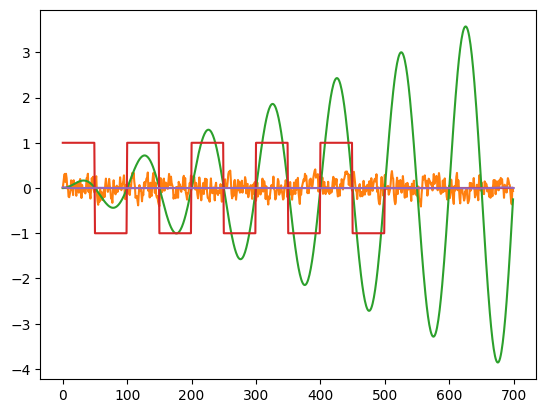

In [100]:
u_rand = np.zeros((uzero.shape))
for t in range(1, u_rand.shape[1]):
    u_rand[0,t] = u_rand[0,t-1] + toy.params.dt * 5. * (-u_rand[0,t-1] + np.random.rand() - 0.5)
target_period = 10.

u_sine = np.zeros((toy.x.shape))
u_sine[0,:] = np.sin(2.*np.pi*np.arange(0,T, toy.params.dt)/target_period)
for t in range(u_sine.shape[1]):
    u_sine[0,t] *= 4. * t / u_sine.shape[1]

u_rect = np.zeros((uzero.shape))
i = 0
while i < u_rand.shape[1]-200:
    u_rect[0,i:i+50] = 1.
    u_rect[0,i+50:i+100] = -1.
    i += 100

u_inits = [0.01 * np.ones(u_rand.shape), u_rand, u_sine, u_rect, u_cos_opt]
res_cost = np.zeros(( 3, len(u_inits)))
res_control = [[None for x0 in range(res_cost.shape[1])] for x1 in range(3) ]
res_state = [[None for x0 in range(res_cost.shape[1])] for x1 in range(3) ]

for u in u_inits:
    plt.plot(u[0,:])

plt.show()

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 0.04788232662186569
Final cost : 0.047882326608345537
Compute control for a deterministic system
Cost in iteration 0: 0.047882326608345537
Converged in iteration 7 with cost 0.04788232660834553
Final cost : 0.04788232660834553
Compute control for a deterministic system
Cost in iteration 0: 0.04788232660834553
Converged in iteration 2 with cost 0.04788232660834553
Final cost : 0.04788232660834553
Compute control for a deterministic system
Cost in iteration 0: 0.04788232660834553
Cost in iteration 100: 0.04788232374782232
Cost in iteration 200: 0.04788232216968842
Final cost : 0.04788232216968842
Compute control for a deterministic system
Cost in iteration 0: 0.04788232216968842
Cost in iteration 100: 0.047882321204061835
Cost in iteration 200: 0.04788232084158275
Final cost : 0.04788232084158275
Compute control for a deterministic system
Cost in iteration 0: 0.04788232084158275

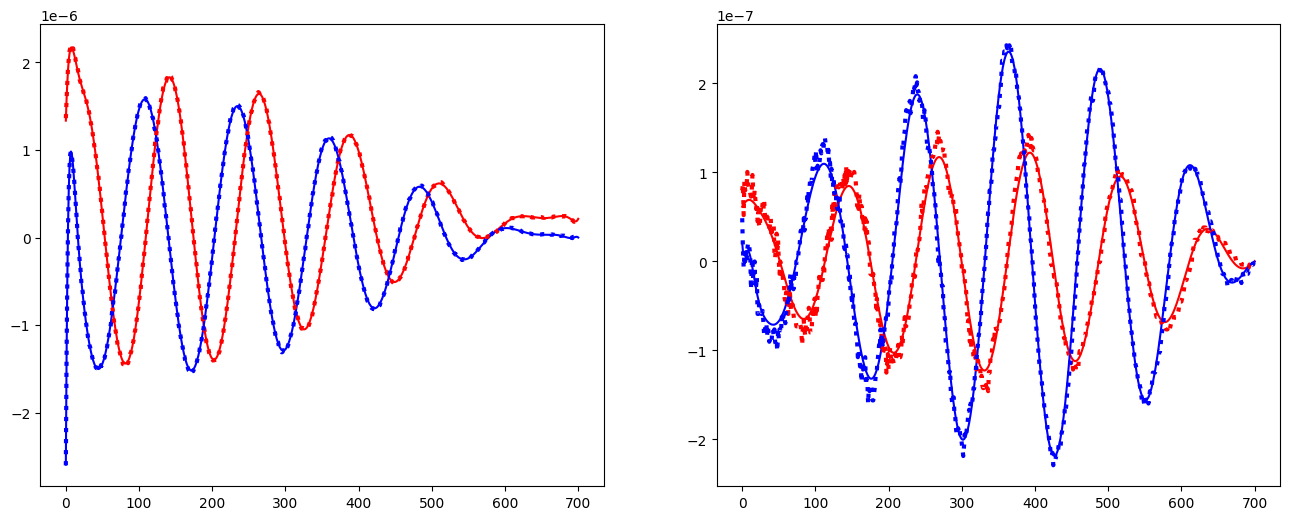

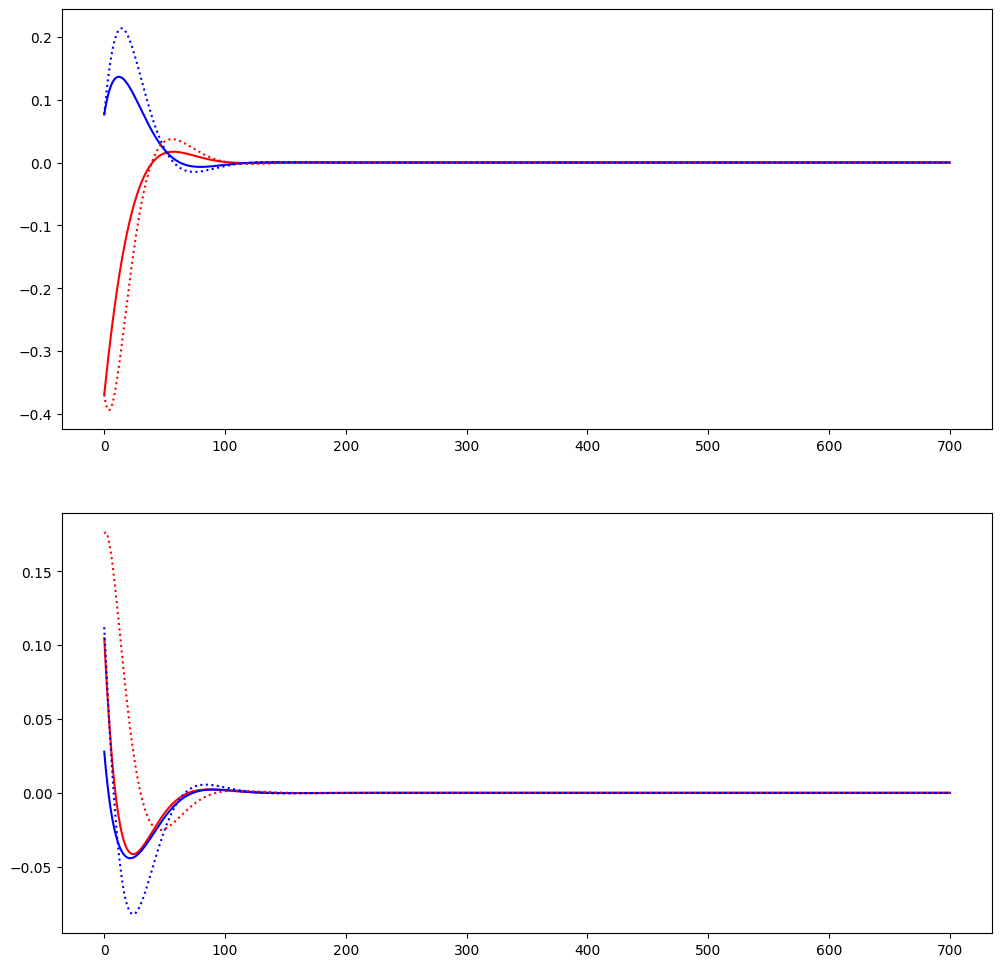

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 0.04788235595902257
Final cost : 0.04788235595180339
Compute control for a deterministic system
Cost in iteration 0: 0.04788235595180339
Converged in iteration 6 with cost 0.047882355951803346
Final cost : 0.047882355951803346
Compute control for a deterministic system
Cost in iteration 0: 0.047882355951803346
Converged in iteration 3 with cost 0.047882355951803346
Final cost : 0.047882355951803346
Compute control for a deterministic system
Cost in iteration 0: 0.047882355951803346
Cost in iteration 100: 0.04788235288277145
Cost in iteration 200: 0.04788234886374668
Final cost : 0.04788234886374668
Compute control for a deterministic system
Cost in iteration 0: 0.04788234886374668
Cost in iteration 100: 0.04788234745061007
Cost in iteration 200: 0.0478823418421532
Final cost : 0.0478823418421532
Compute control for a deterministic system
Cost in iteration 0: 0.0478823418421532

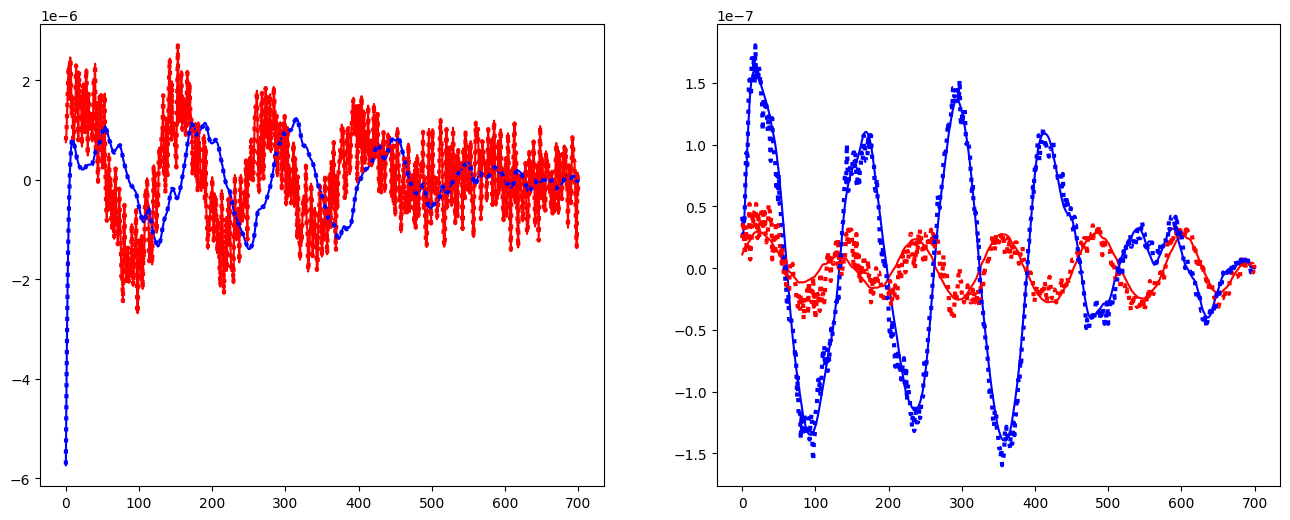

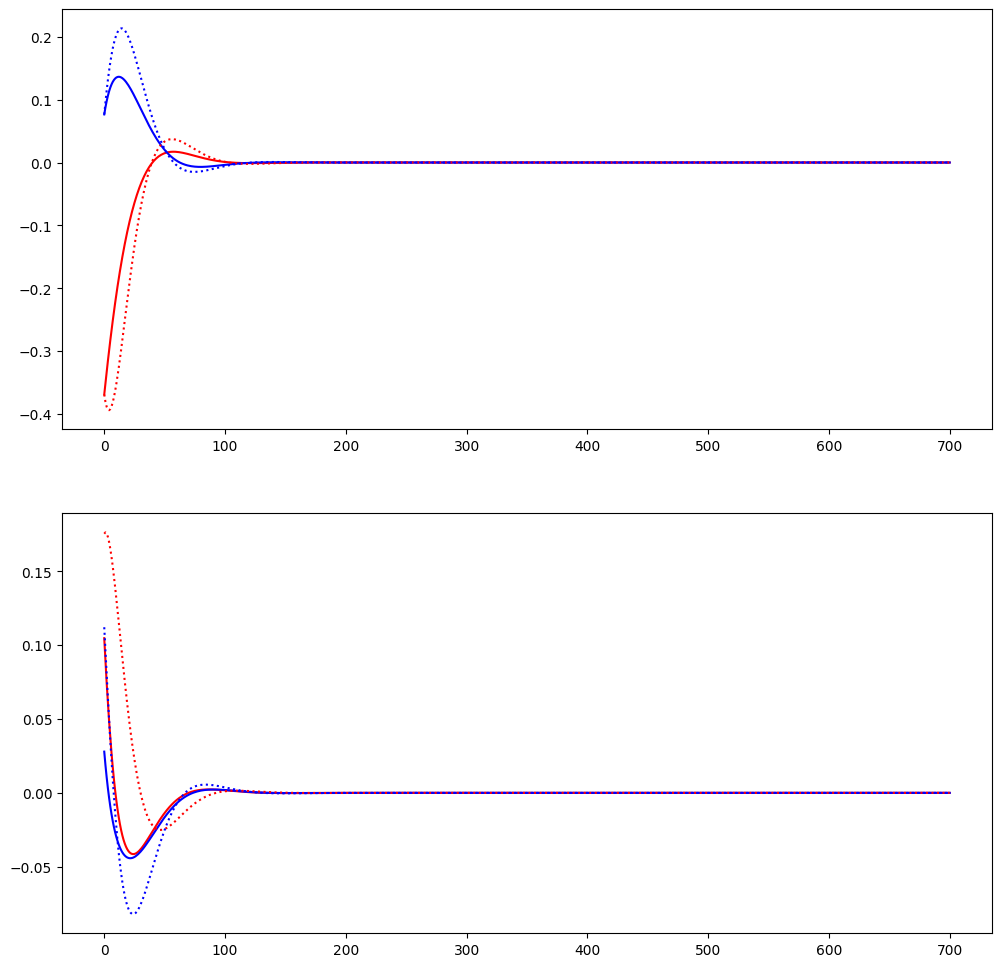

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 0.04817696412534717
Final cost : 0.04817662328090454
Compute control for a deterministic system
Cost in iteration 0: 0.04817662328090454
Cost in iteration 100: 0.048163576065266174
Cost in iteration 200: 0.04813101854622779
Final cost : 0.04813101854622779
Compute control for a deterministic system
Cost in iteration 0: 0.04813101854622779
Cost in iteration 100: 0.04812256092902802
Cost in iteration 200: 0.048109501266235484
Final cost : 0.048109501266235484
Compute control for a deterministic system
Cost in iteration 0: 0.048109501266235484
Cost in iteration 100: 0.04809945356094208
Cost in iteration 200: 0.048084688501766275
Final cost : 0.048084688501766275
Compute control for a deterministic system
Cost in iteration 0: 0.048084688501766275
Cost in iteration 100: 0.04807326644589559
Cost in iteration 200: 0.04806851991679396
Final cost : 0.04806851991679396
Compute control f

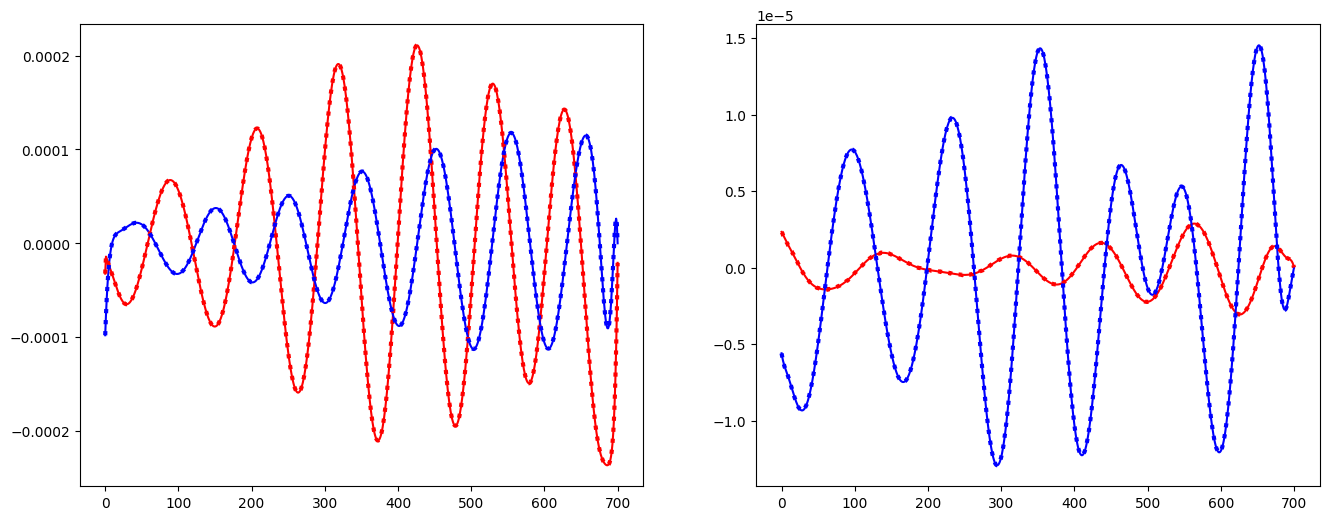

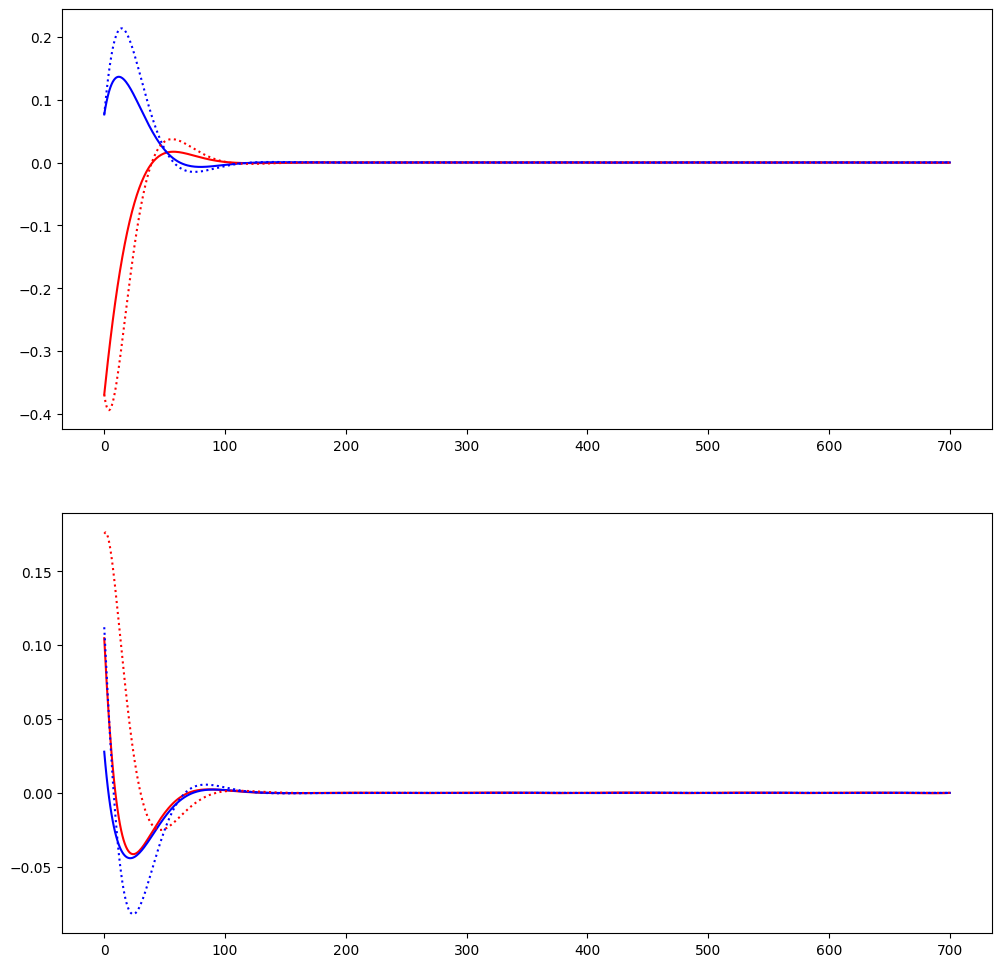

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 0.04788322280860432
Final cost : 0.04788322263776296
Compute control for a deterministic system
Cost in iteration 0: 0.04788322263776296
Cost in iteration 100: 0.04788315710778357
Cost in iteration 200: 0.04788301845074583
Final cost : 0.04788301845074583
Compute control for a deterministic system
Cost in iteration 0: 0.04788301845074583
Cost in iteration 100: 0.047882989449080815
Cost in iteration 200: 0.04788296203609952
Final cost : 0.04788296203609952
Compute control for a deterministic system
Cost in iteration 0: 0.04788296203609952
Cost in iteration 100: 0.047882892443739444
Cost in iteration 200: 0.047882828254054696
Final cost : 0.047882828254054696
Compute control for a deterministic system
Cost in iteration 0: 0.047882828254054696
Cost in iteration 100: 0.04788274374023205
Cost in iteration 200: 0.04788272862444916
Final cost : 0.04788272862444916
Compute control for

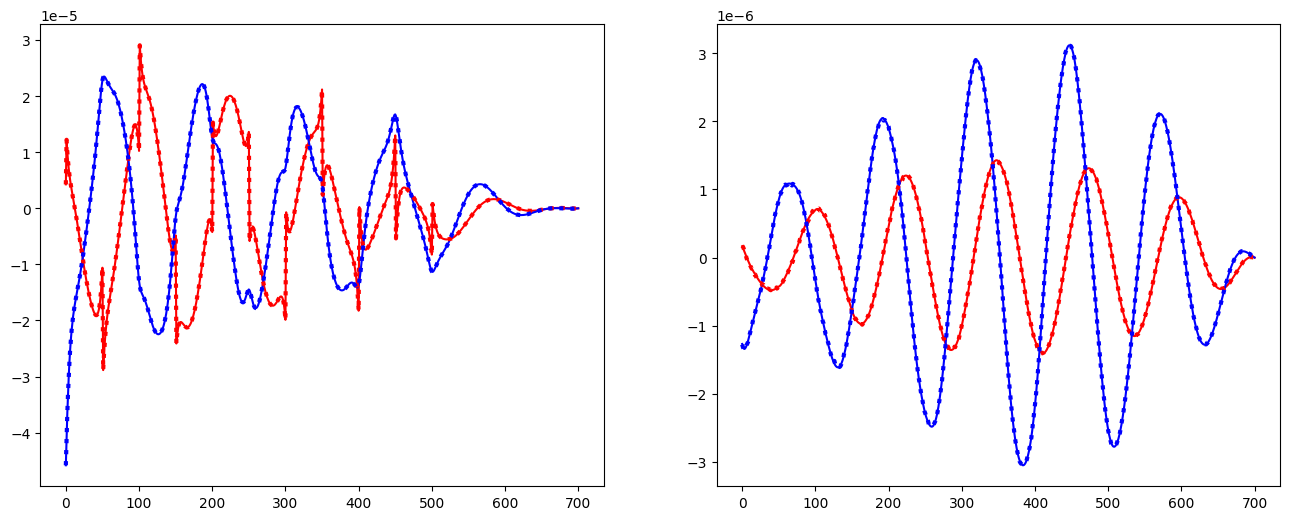

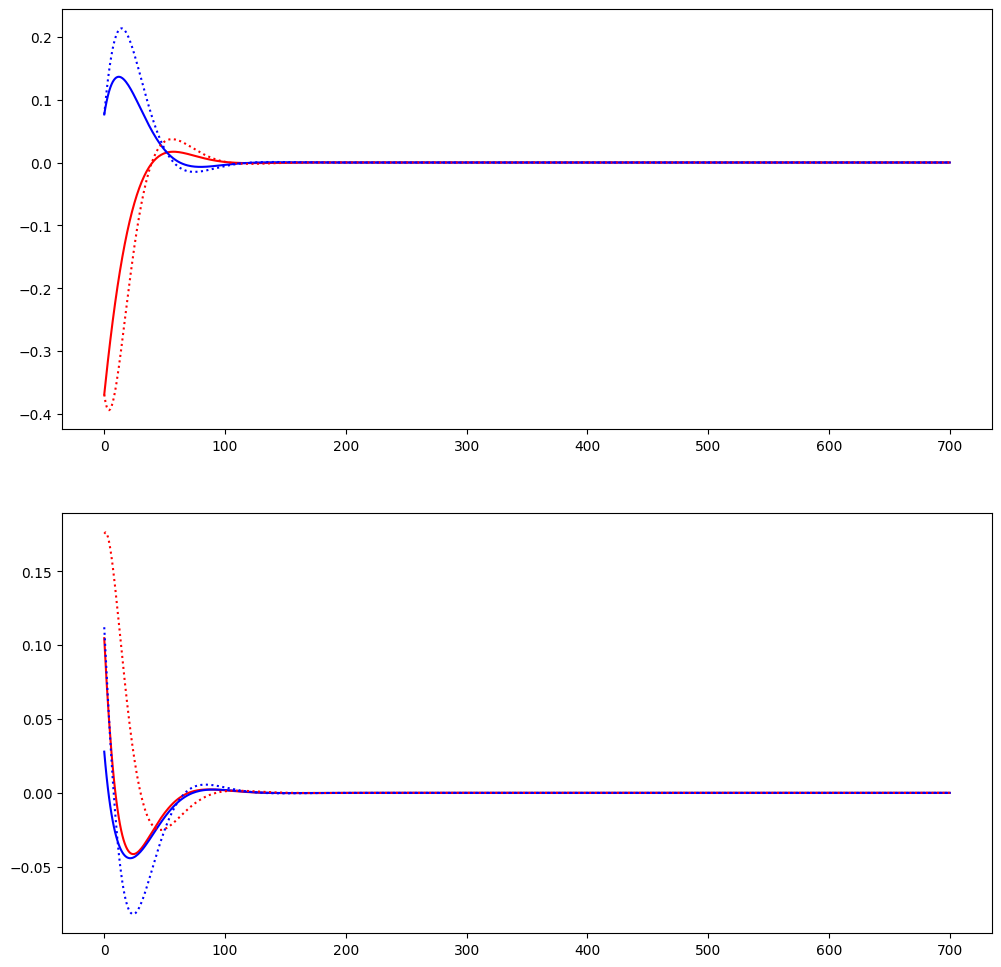

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 0.04788231657457729
Final cost : 0.04788231657104482
Compute control for a deterministic system
Cost in iteration 0: 0.04788231657104482
Converged in iteration 6 with cost 0.047882316571044796
Final cost : 0.047882316571044796
Compute control for a deterministic system
Cost in iteration 0: 0.047882316571044796
Cost in iteration 100: 0.04788231646114568
Cost in iteration 200: 0.04788231619458973
Final cost : 0.04788231619458973
Compute control for a deterministic system
Cost in iteration 0: 0.04788231619458973
Converged in iteration 2 with cost 0.04788231619458973
Final cost : 0.04788231619458973
Compute control for a deterministic system
Cost in iteration 0: 0.04788231619458973
Converged in iteration 5 with cost 0.047882316194589714
Final cost : 0.047882316194589714
Compute control for a deterministic system
Cost in iteration 0: 0.047882316194589714
Cost in iteration 100: 0.04

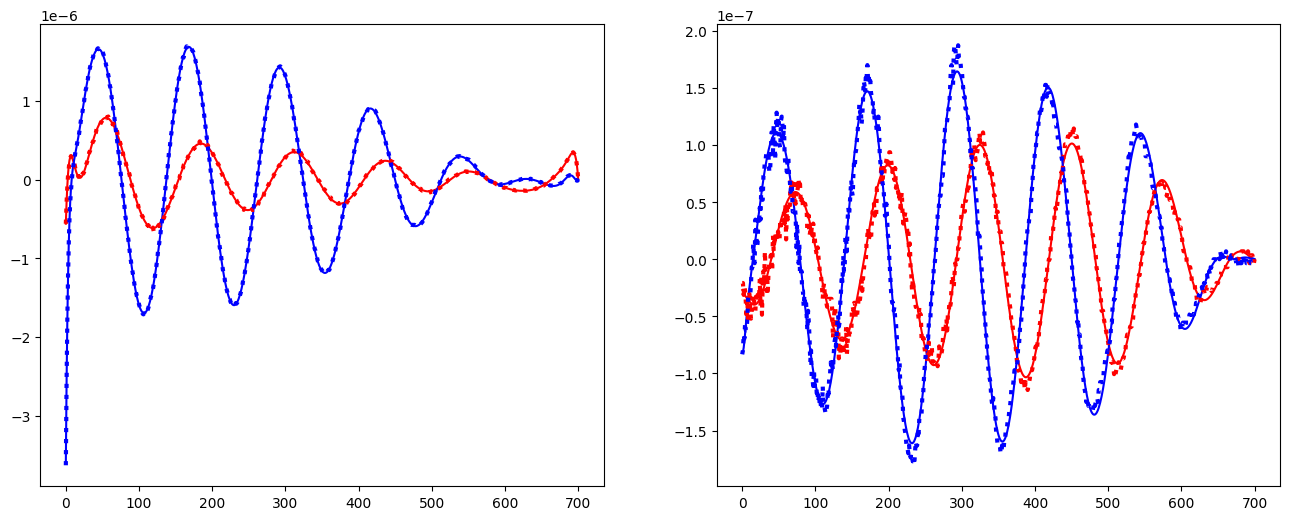

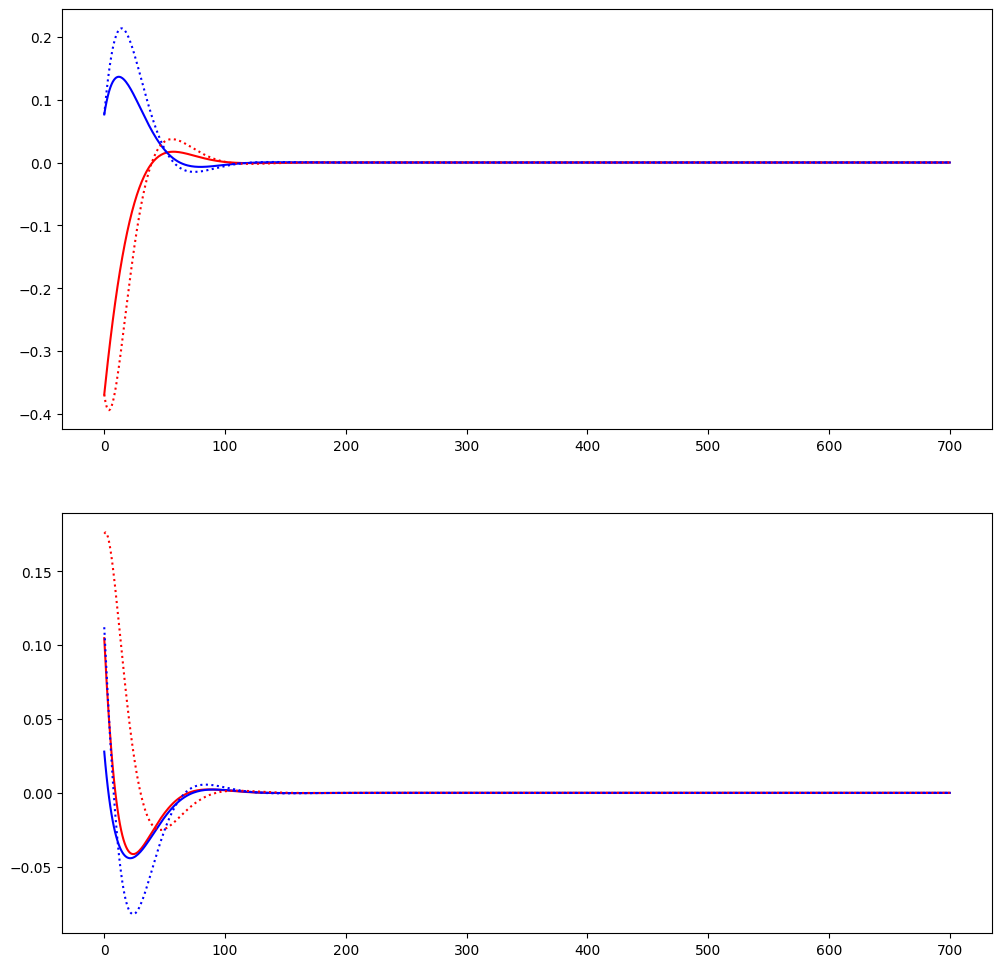

In [109]:
for ui, u in enumerate(u_inits):

    #if ui not in [2]: continue
    
    toy.params.x_ext = u

    toy_controlled = oc_toy.OcToy(toy, target_period, print_array=np.arange(0,1000,100),
                                  cost_interval=(0,None), control_interval=(0,None), grad_method=0)
    
    toy_controlled.channelwise_optimization=True

    #for factor in np.random.random(10):
    for factor in [1]:

        toy_controlled.weights["w_2"] = 1. * 1.
        toy_controlled.weights["w_p"] = 0.
        toy_controlled.weights["w_var"] = 1. * factor

        if True:
            if type(res_control[toy_controlled.grad_method][ui]) is not type(None):
                toy_controlled.control = res_control[toy_controlled.grad_method][ui].copy()
                toy_controlled.update_input()
                toy_controlled.optimize(1)

        #toy_controlled.grad_method = 1

        for k in range(2):
            for exp in np.arange(-12, 6, 1):
                toy_controlled.zero_step_encountered = False
                toy_controlled.step = 10.**exp
                toy_controlled.optimize(200)

        if True:
            grad_an = toy_controlled.compute_gradient()
            grad_num = toy_controlled.compute_gradient_num()

            fig, ax = plt.subplots(1,2, figsize=(16,6))
            ax[0].plot(grad_an[0,0,:], color="red")
            ax[0].plot(grad_an[0,1,:], color="blue")
            ax[1].plot(grad_an[1,0,:], color="red")
            ax[1].plot(grad_an[1,1,:], color="blue")
            ax[0].plot(grad_num[0,0,:], color="red", linestyle=":", linewidth=3)
            ax[0].plot(grad_num[0,1,:], color="blue", linestyle=":", linewidth=3)
            ax[1].plot(grad_num[1,0,:], color="red", linestyle=":", linewidth=3)
            ax[1].plot(grad_num[1,1,:], color="blue", linestyle=":", linewidth=3)
            plt.show()

    #toy_controlled.grad_method = 0

    if True:
        res_cost[toy_controlled.grad_method, ui] =  toy_controlled.cost_history[-1]   
        res_control[toy_controlled.grad_method][ui] = toy_controlled.control.copy()
        res_state[toy_controlled.grad_method][ui] = toy_controlled.get_xs().copy()

    if True:
        xs = toy_controlled.get_xs()
        control = toy_controlled.control

        fig, ax = plt.subplots(2,1, figsize=(12,12))
        ax[0].plot(xs[0,0,:], color="red")
        ax[0].plot(xs[0,1,:], color="blue")
        ax[0].plot(xs[1,0,:], color="red", linestyle=":")
        ax[0].plot(xs[1,1,:], color="blue", linestyle=":")

        ax[1].plot(control[0,0,:], color="red")
        ax[1].plot(control[0,1,:], color="blue")
        ax[1].plot(control[1,0,:], color="red", linestyle=":")
        ax[1].plot(control[1,1,:], color="blue", linestyle=":")
        plt.show()

In [110]:
print(res_cost)

[[0.04788231 0.04788231 0.04788283 0.04788232 0.04788231]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


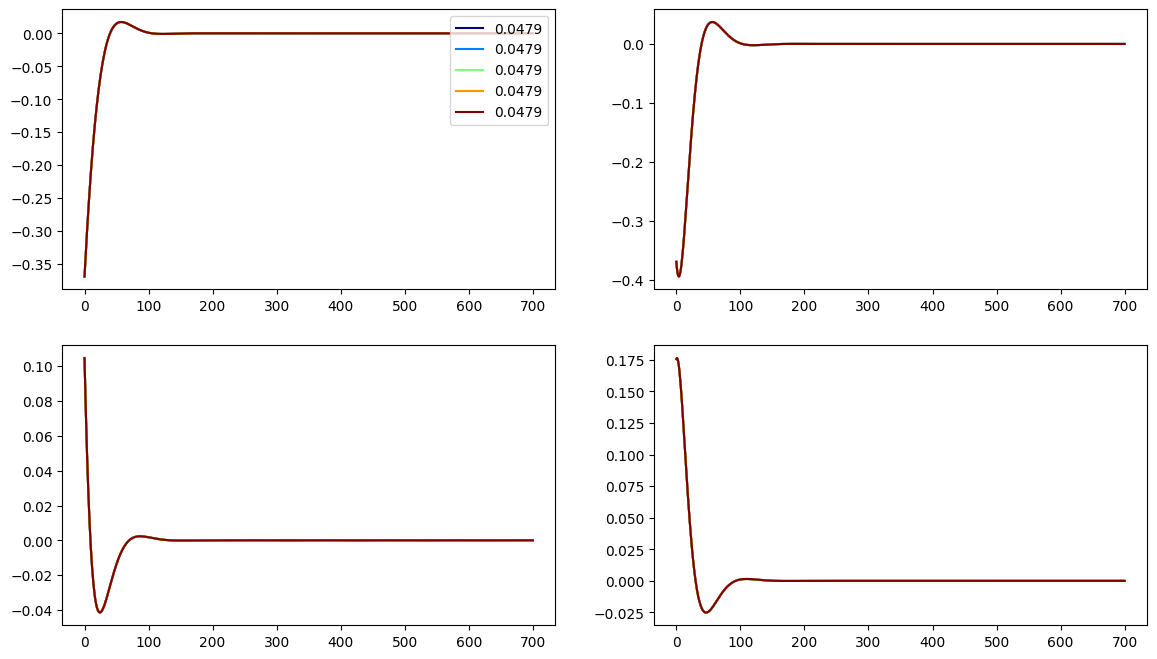

In [111]:
cmap = plt.cm.get_cmap("jet")
fig, ax = plt.subplots(2, 2, figsize=(14,8))

gradmet = 0

for init_i in range(len(u_inits)):
    col = cmap(init_i/(len(u_inits)-1))
    ax[0,0].plot(res_state[gradmet][init_i][0,0,:], color=col, label=np.around(res_cost[gradmet][init_i], 4))
    ax[0,1].plot(res_state[gradmet][init_i][1,0,:], color=col)
    ax[1,0].plot(res_control[gradmet][init_i][0,0,:], color=col)
    ax[1,1].plot(res_control[gradmet][init_i][1,0,:], color=col)

ax[0,0].legend(loc="upper right")

In [ ]:
for ui in range(len(u_inits)):
    amp = np.amax(res_control[ui][0,0,:]) - np.amin(res_control[ui][0,0,:])
    print(amp * toy_controlled.weights["w_2"] * np.pi / toy_controlled.weights["w_f"])

TypeError: list indices must be integers or slices, not tuple